In [9]:
# -*- coding: utf-8 -*-
"""
Created on Sun Sep 18 12:00:51 2022

@author: Gerard
"""

# conda install -c conda-forge mne
# conda install -c conda-forge pyvistaqt
# conda install -c conda-forge ipywidgets
# conda install -c conda-forge darkdetect


import os
import mne
import numpy as np
from mne.decoding import CSP
import matplotlib.pyplot as plt



# Load data sets

In [10]:
data_loo = mne.io.read_epochs_eeglab(input_fname = "C:/Users/gerar/OneDrive - IMT MINES ALES/CODES_IMT/MNE/Data_Awake/Subject_11_H_AEP_Run_01.set")
data_tst = mne.io.read_epochs_eeglab(input_fname = "C:/Users/gerar/OneDrive - IMT MINES ALES/CODES_IMT/MNE/Data_Awake/Subject_10_H_AEP_Run_01.set")

print(data_loo.info)
print(data_tst.info)




Extracting parameters from C:\Users\gerar\OneDrive - IMT MINES ALES\CODES_IMT\MNE\Data_Awake\Subject_11_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from C:\Users\gerar\OneDrive - IMT MINES ALES\CODES_IMT\MNE\Data_Awake\Subject_10_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.
<Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 8 items (8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 256.0 Hz
>
<Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 8 items (8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 256.0 Hz
>


    Using multitaper spectrum estimation with 7 DPSS windows


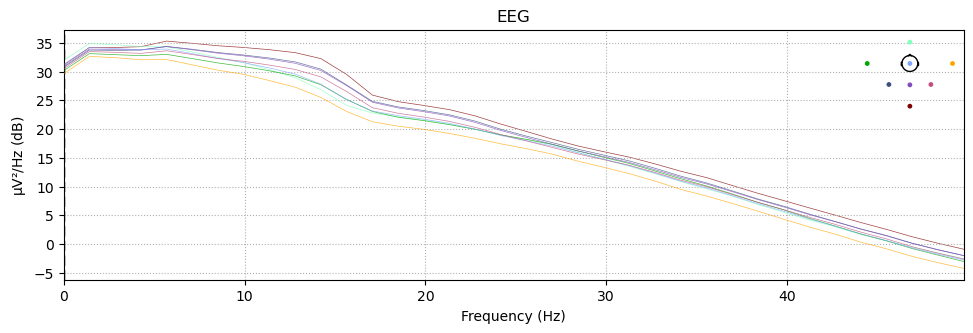

Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 283 samples (1.105 sec)



C:\Users\gerar\AppData\Local\Temp\ipykernel_20832\3196495510.py:4: RuntimeWarning: filter_length (283) is longer than the signal (180), distortion is likely. Reduce filter length or filter a longer signal.
  data_loo.filter(12., 30., fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done 3840 out of 3840 | elapsed:    0.7s finished


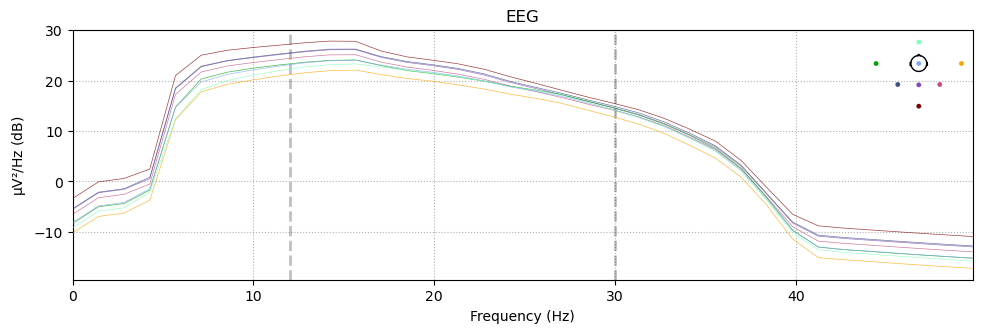

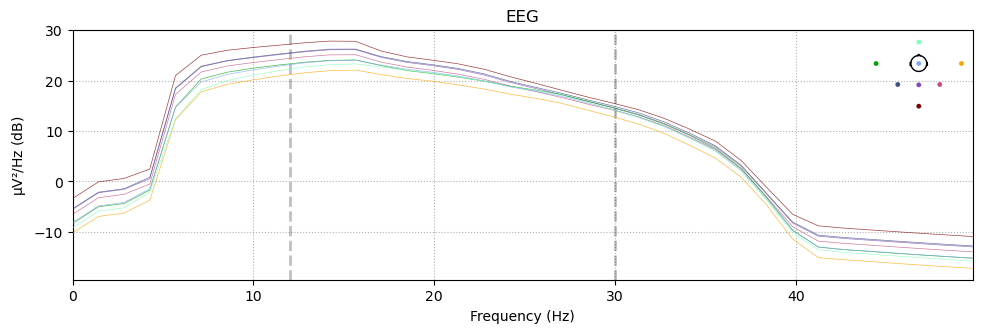

In [5]:
data_loo.plot_psd(fmax=50)

# band-pass filtering in the range 1 Hz - 50 Hz
data_loo.filter(12., 30., fir_design='firwin')

data_loo.plot_psd(fmax=50)


In [11]:
events_num = data_loo.events
event_id = {'Frequent': 1, 'Target': 2}
data_loo.plot(butterfly=False, events=events_num, event_id=event_id)

In [12]:
t = data_loo.times
x = data_loo.get_data()
y = data_loo.events[:,2]
x_csp_average = CSP(n_components=6, transform_into='average_power').fit_transform(x, y)

print(x_csp_average)

Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 8 dim * 9.4e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.9e-06 (2.2e-16 eps * 8 dim * 3.9e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
[[-1.2914822  -0.88632756 -0.51320967 -1.92866471 -1.53036937 -0.805537  ]
 [-0.89208774 -0.35877956 -1.4335205  -1.70896103 -1.26420468  0.06993202]
 [-1.28082043 -1.83111204 -1.7105161   0.31088006 -1.58945684 -2.07868669]
 ...
 [-0.04988749 -0.4538856  -1.01266451 -1.21901488 -1.06053201 -0.01805965]
 [ 0.7344182  -0.5214834  -0.56665054  0.05419206 -0.80953653 -1.49719722]
 [-1.56027926 -0.66720475 -0.7227454  -0.80674